# Analysis of Song Popularity on Spotify

This project is to determine what factors help determine the popularity of a song, and to what extent these factors relate to a song's popularity. The dataset used contains songs from 1921-2020 and includes many variables.

Acouticness, Danceability, Energy, Instrumentalness, Liveness, Speechniness, and Valence are all variables with a range of 0-1 describing as a percentage how well the song reflects the given variablses. So a song with a danceability of 96%, for instance, would be a song considered extremely danceable. 

Valence describes how positive a song is considered.

Mode is a dummy variable showing if the song was began with a major or minor chord progression. One equals major; zero equals minor.

Explicit is a dummy variable showing if the song contains explicit content. One equals explicit content; zero equals no explicit content.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('C:\\Users\\Woyte\\Desktop\\Data\\Spotify Data\\data.csv')
data_artist= pd.read_csv ('C:\\Users\\Woyte\\Desktop\\Data\\Spotify Data\\data_by_artist.csv')
data_genre = pd.read_csv ('C:\\Users\\Woyte\\Desktop\\Data\\Spotify Data\\data_by_genres.csv')
data_year = pd.read_csv ('C:\\Users\\Woyte\\Desktop\\Data\\Spotify Data\\data_by_year.csv')
data_w_genre = pd.read_csv ('C:\\Users\\Woyte\\Desktop\\Data\\Spotify Data\\data_w_genres.csv')

In [3]:
data=data.drop('id', axis=1)
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
data_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [5]:
data_genre.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [6]:
data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [7]:
data_w_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

Based on the non-null values, there's doesn't appear to be any null values in the first dataset. Still, it's best to double check to make sure.

In [9]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [10]:
data_genre.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [11]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Some basic exploratory analysis. There are some interesting numbers that would be worth looking into later. Both the amount of instrumentalnes and speechiness in these songs skewy low. The explicit mean of .846 shows that most songs produced since 1921 contains the use of explicit language. Seeing how this relates to year and popularity can be interesting. Finally a mode mean of .71 shows that most songs since 1921 have begun with a major chord progression.

The big feature to make note of is popularity. While the popularity metric is a number between the range of 1 and 100, the average popularity is onl 31.43. This means that most songs on Spotify are not very popular. Popularity also has a standard deviation of nearly 22, a little over a fifth of its whole range. These two statistics together show that distribution for popularity won't be even, and there will almost definitely be outliers in the distribution. 

In [12]:
data_corr= data.corr()
data_corr

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


This looks pretty dry though, so let's pretty it up a bit!

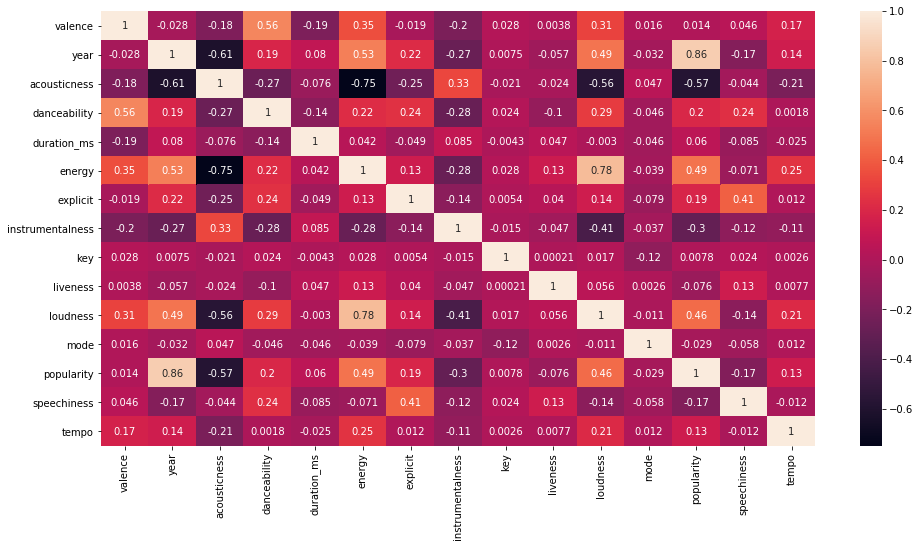

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_corr,annot=True)

In [14]:
data_corr["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.862442
energy              0.485005
loudness            0.457051
danceability        0.199606
explicit            0.191543
tempo               0.133310
duration_ms         0.059597
valence             0.014200
key                 0.007826
mode               -0.028897
liveness           -0.076464
speechiness        -0.171979
instrumentalness   -0.296750
acousticness       -0.573162
Name: popularity, dtype: float64

Based on the heatmap, a song's popularity in the original dataset is most correlated to the year the song was released. In this case, that means that the later a song was released, the more popular a song was. Or in other words, there is strong recency bias when it comes to a song's popularity. It also has a pretty strong positive correlation to the song's energy and its loudness. On the other hand, it has a signficiant negative correlations to a song's acousticness and instrumentalness. 

As loudness and energy are both positively correlated to popularity, it's worth pointing out that the two features are also significantly correlated with each other as .78. 

So what about the correlations for the other datasets?

In [15]:
data_artist_corr= data_artist.corr()
data_year_corr= data_year.corr()
data_genre_corr= data_genre.corr()
data_w_genre_corr= data_w_genre.corr()

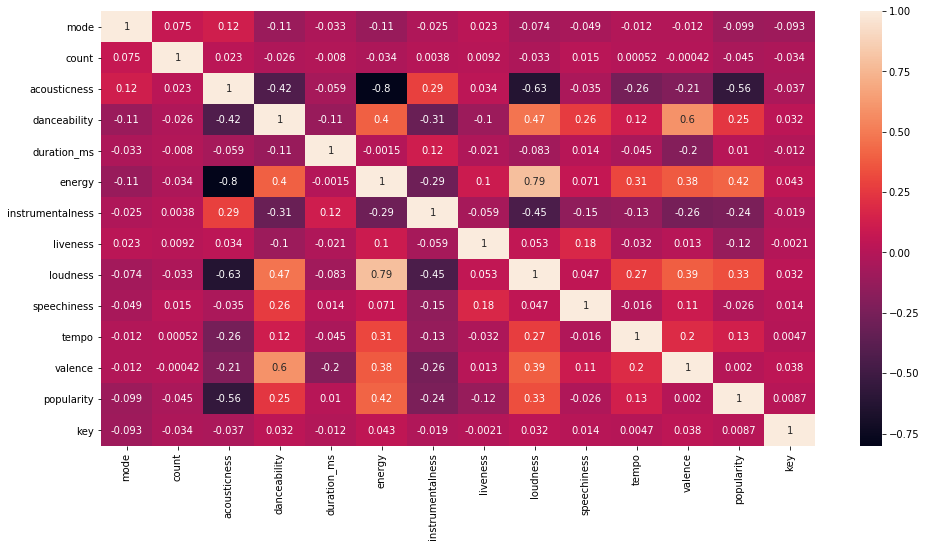

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_artist_corr,annot=True)

In [17]:
data_artist_corr["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.415092
loudness            0.332941
danceability        0.246283
tempo               0.132922
duration_ms         0.010137
key                 0.008743
valence             0.002005
speechiness        -0.025825
count              -0.044916
mode               -0.099185
liveness           -0.120099
instrumentalness   -0.235548
acousticness       -0.556790
Name: popularity, dtype: float64

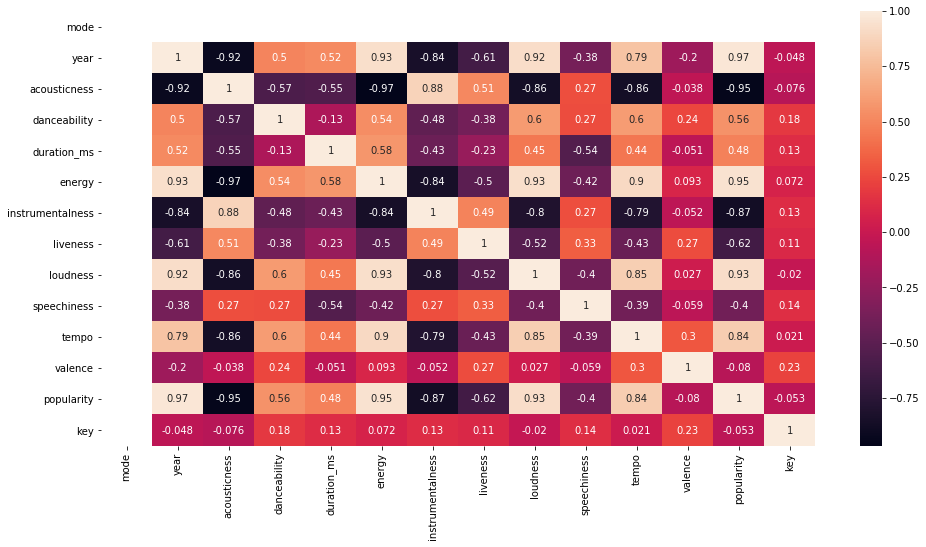

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_year_corr,annot=True)

In [19]:
data_year_corr["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.974517
energy              0.953637
loudness            0.928369
tempo               0.843231
danceability        0.560226
duration_ms         0.484321
key                -0.053469
valence            -0.079516
speechiness        -0.398338
liveness           -0.623418
instrumentalness   -0.872021
acousticness       -0.945010
mode                     NaN
Name: popularity, dtype: float64

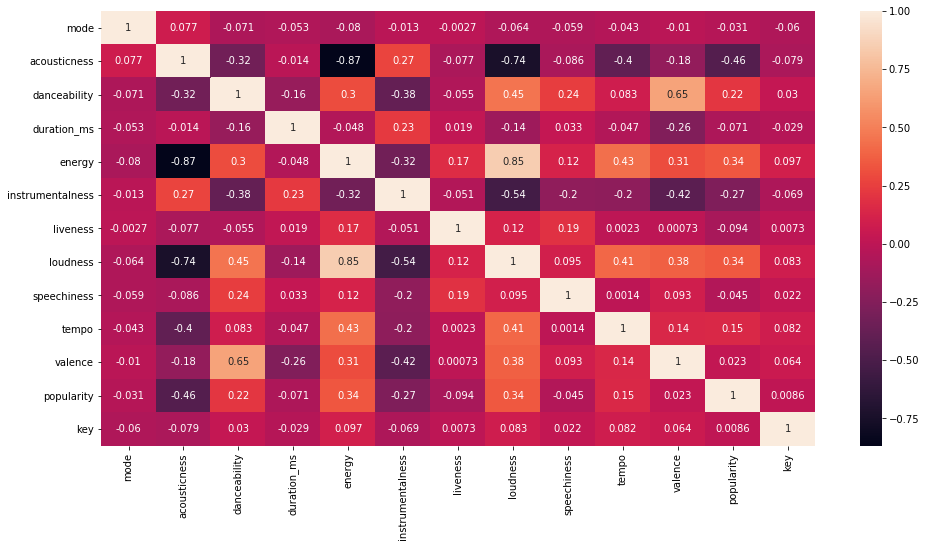

In [20]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_genre_corr,annot=True)


In [21]:
data_genre_corr["popularity"].sort_values(ascending=False)

popularity          1.000000
loudness            0.344361
energy              0.337795
danceability        0.217992
tempo               0.146717
valence             0.023072
key                 0.008577
mode               -0.031231
speechiness        -0.045217
duration_ms        -0.071019
liveness           -0.094178
instrumentalness   -0.265449
acousticness       -0.458698
Name: popularity, dtype: float64

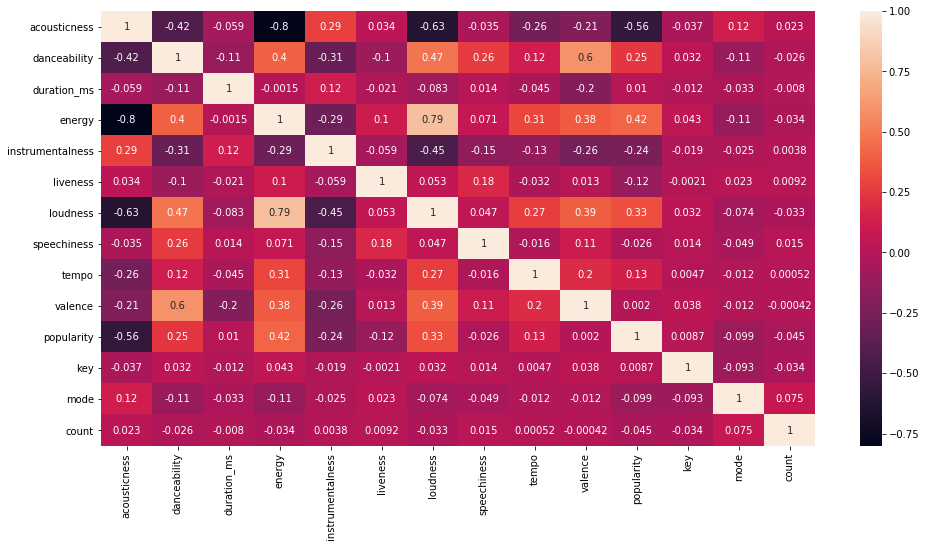

In [22]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_w_genre_corr, annot=True)

In [23]:
data_w_genre_corr["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.415092
loudness            0.332941
danceability        0.246283
tempo               0.132922
duration_ms         0.010137
key                 0.008743
valence             0.002005
speechiness        -0.025825
count              -0.044916
mode               -0.099185
liveness           -0.120099
instrumentalness   -0.235548
acousticness       -0.556790
Name: popularity, dtype: float64

Most of the other datasets hold to the same relationship, though the data with songs grouped by year has some new, interesting relationships. In fact most of the features outside of the song's valence, or positivity, seems to correlate with its popularity in a some strong way. 

Speechniness and Liveness are negatively correlated to it as well now, and tempo, energy, duration, and are all positively correlation to it.

So now that we know what features can give information on a song's popularity, what does the popularity variable look like in the dataset?

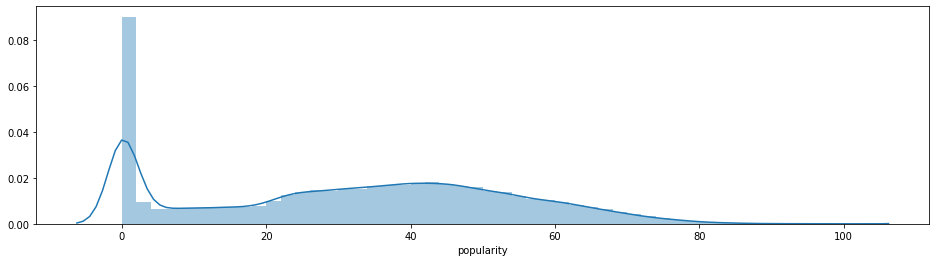

In [24]:
plt.figure(figsize=(16, 4))
sns.distplot(data["popularity"])

This is an extremely interesting distribution. Ignoring the outlier, this could be considered a fairly normal distrubition, if skewing ever so slightly to the left. With the outlier though, it's clear that the majority of songs uploaded to Spotify are not popular. This could be due to how many independent artists there are on the platform. 

The outlier songs could be removed in order to simplify the dataset and potentially get more accurate relationships with popularity, but considering just how many songs fall within the range, I'll keep them for now.

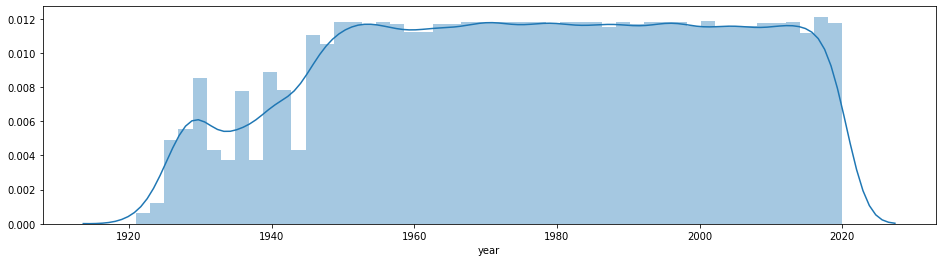

In [25]:
plt.figure(figsize=(16, 4))
sns.distplot(data["year"])

As one would expect, the periods between 1921-1950 show a ramping up of music featured on Spotify. There was a dip in the 1930's, probably due to the Great Depression severely hampering the markets for many luxury goods, including music, but they grew regardless.

What is surprising is that the amount of songs between 1950-2020 has been consistent. Spotify holds a similar amount of songs from 1960 as they do from 2020. My initial assumption would be that the amount of songs would continue to rise after 1950, especially given the boon Spotify and other such services have been for independent artists. But that does not seem to be the case.

Finally, it might be hard to properly analyze some of the years before 1950. especially the years in the 1920's. This is due to such few songs being on Spotify for them. It would be hard to determine is a certain feature of a song is unique to the song, or an aspect of the music industry of the year more generally. 

Now what are the most popular songs on Spotify?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

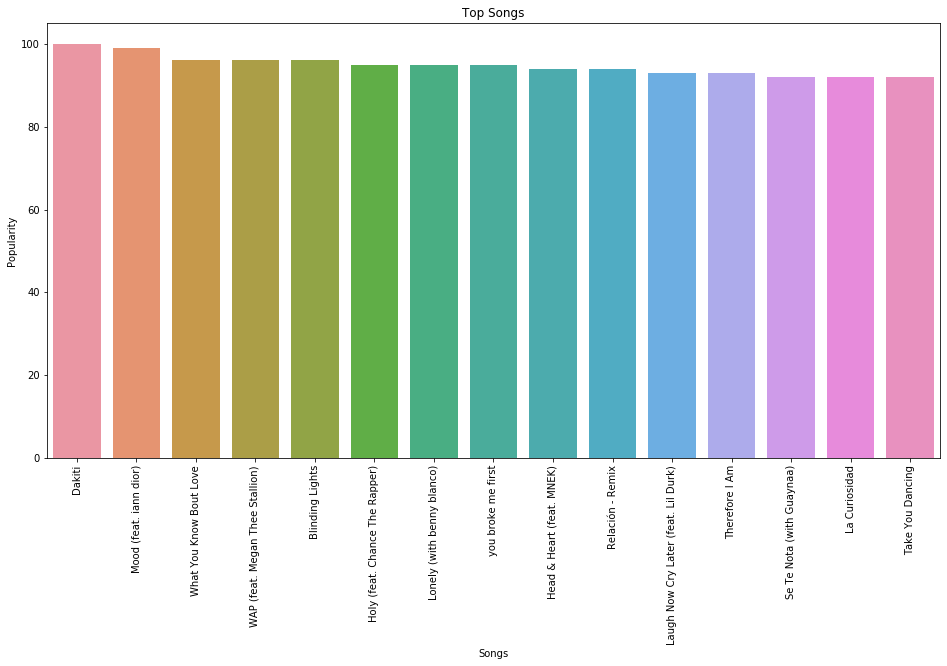

In [26]:
plt.figure(figsize=(16, 8))
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(x.index, x)
axis.set_title('Top Songs')
axis.set_ylabel('Popularity')
axis.set_xlabel('Songs')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

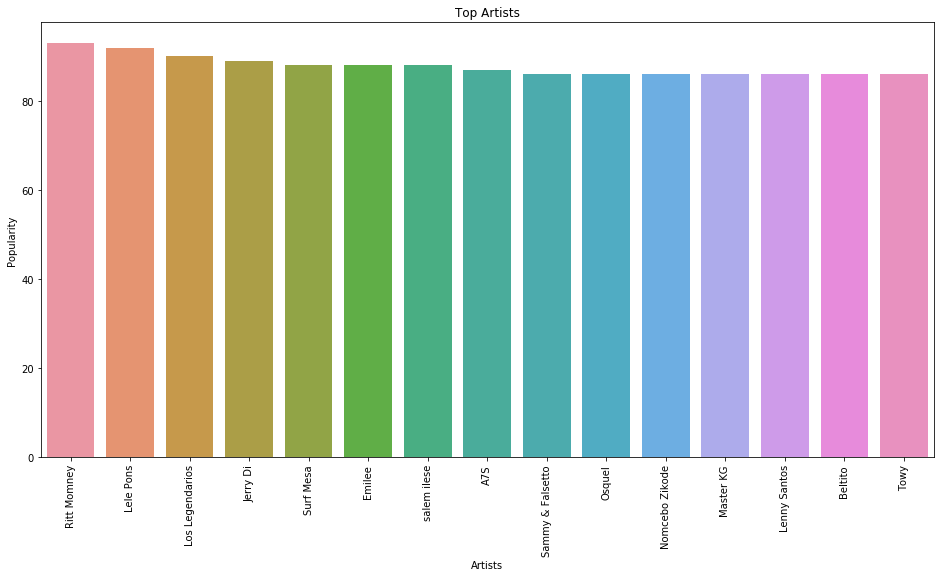

In [27]:
plt.figure(figsize=(16, 8))
x = data_artist.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

As the graphs show, the most popular songs and artists from the collection of this data appear to be the more recent ones on the platform. This holds with the high correlation seen between the year a song is released and its popularity.

Now that we have a good grasp of the datasets we are working with, we can safely move on to building a model.

# Model Building

As the initial question of this study was 'What determines a song's popularity on Spotify?', we will be building a model based off 'popularity' being the predicted variable, and the other factors being potential predictor variables.

To start out with, I'll be dropping the use of all but the first dataset. The other datasets either have too few datapoints to be useful for model building or would be irrelevant to the question at hand. Therefore, we'll stick with the original dataset. Also, we should split the data into a training test and a testing set. This is so we make sure that we don't overfit our models to the data we have, and it'll be better prepared for any new data going forward.

In [28]:
data=data.drop(["name", "artists", "release_date"], axis=1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

data_train_set, data_test_set = train_test_split(data, test_size=0.33, random_state=42)


In [29]:
data_train_set.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
125020,0.329,1930,0.987,0.466,183400,0.240,0,0.000116,6,0.0681,-9.085,1,0,0.0460,134.402
95445,0.317,1953,0.900,0.326,199907,0.402,0,0.839000,7,0.6170,-11.702,1,0,0.0417,86.188
48551,0.553,1976,0.018,0.427,386667,0.730,0,0.000364,9,0.2180,-6.173,0,39,0.0360,106.255
34968,0.472,2002,0.265,0.699,254467,0.668,0,0.000000,1,0.1410,-5.305,1,57,0.1060,83.074
31555,0.158,1985,0.968,0.336,239467,0.167,0,0.001480,2,0.0806,-10.552,0,43,0.0386,128.139


In [30]:
data_train_set2= data_train_set.drop("popularity", axis=1)
data_labels= data_train_set["popularity"].copy()

In [31]:
data_train_set2.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
125020,0.329,1930,0.987,0.466,183400,0.240,0,0.000116,6,0.0681,-9.085,1,0.0460,134.402
95445,0.317,1953,0.900,0.326,199907,0.402,0,0.839000,7,0.6170,-11.702,1,0.0417,86.188
48551,0.553,1976,0.018,0.427,386667,0.730,0,0.000364,9,0.2180,-6.173,0,0.0360,106.255
34968,0.472,2002,0.265,0.699,254467,0.668,0,0.000000,1,0.1410,-5.305,1,0.1060,83.074
31555,0.158,1985,0.968,0.336,239467,0.167,0,0.001480,2,0.0806,-10.552,0,0.0386,128.139


Now it's time to standardize the data. Since the data uses different scales, it's best to standardize the scaling so that the different scaling doesn't mess up their determinative capabilities. 

In [32]:
pipe = Pipeline([('std', StandardScaler())])
pipe.fit(data_train_set2, data_labels)



Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

This model will start with a simple linear regression. They are often the best way to start off modeling for a continous predicted variable like popularity. 

In [34]:
scaler=StandardScaler().fit(data_train_set2)
data_train_scaled = scaler.transform(data_train_set2)

from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(data_train_scaled, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
experiment_labels = data_labels.iloc[:5]
reg.predict(data_train_scaled[:5])


array([-0.30200639,  9.53349374, 33.44509239, 50.10280427, 36.35057419])

In [36]:
print(list(experiment_labels))

[0, 0, 39, 57, 43]


In [71]:
data_train_scaled

array([[-0.76017212, -1.8086421 ,  1.29209753, ...,  0.64327448,
        -0.32112104,  0.57291699],
       [-0.8057421 , -0.92046113,  1.06056285, ...,  0.64327448,
        -0.34773769, -0.99746826],
       [ 0.09046755, -0.03228016, -1.2867197 , ..., -1.55454636,
        -0.38302023, -0.34386306],
       ...,
       [ 0.29173497, -0.07089672,  1.26548435, ...,  0.64327448,
        -0.04505066, -0.11518104],
       [-1.85688969, -0.03228016,  1.25750039, ...,  0.64327448,
        -0.31555012,  2.18785957],
       [-0.44497974,  1.08760019, -1.107613  , ...,  0.64327448,
         1.78964127,  1.84915222]])

In [37]:
from sklearn.metrics import mean_squared_error
data_predict = reg.predict(data_train_scaled)
mse= mean_squared_error(data_labels, data_predict)
rmse= np.sqrt(mse)
rmse

10.854295899445983

After the model was created, I decided to test it in two ways. The first way was by feeding it back in some data from the training set. I could've also used the test set, but I don't want the test set to be used against the model as that might accidentally overfit the model to the test set. It's best to bring in the test set only after the model has been fully tuned.

So with the first experiment, which took the first five data points in the training set, we see that the model predicted they'd have a popularity of -.3. 9.5, 33.44. 50.1. and 36.4. This data is also scaled differently than the original, being on a 0-100 scale than a 0-1, so all the numbers need to be divided by 100 to reach their accurate numbers.

As for the actual values, we have 0, 0, 39, 57, and 43. Comparing that to -.003, .095, .334, .501, and .364, we see that the numbers weren't too far off. It was a good approximation at the least.

The RMSE basically gives the average error for the predicted variable. So the RMSE of 10.8 says that the popularity is typically off by around 10.8, which isn't the best. This model is slightly underfitting the data. Because of this, we should test out some other models and see how they perform with the data

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(data_train_scaled, data_labels)
predictions= forest.predict(data_train_scaled)
tree_mse= mean_squared_error (data_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)


3.6977607948892675


An RMSE of 3.69 is better than our previous RMSE. This is more useful than the basic approximation our regression model gave us. 

Of course it's important to understand what a random forest is. It's multiple decision trees run simultaneously, then averaging them out. As my computer can attest to, it's much more taxing and time consuming than a simple decision tree or linear regression, but it typically performs better.

With an RMSE of 3.69, there is a chance that my model overfit my data, meaning that, while it's accurate for the data given, it might not perform as well to any new data. I could check it by using Cross Validation or another parameter tuning method, but overall I'm satisfied with the model as is. 

In [61]:
data_train_scaled[4:5]

array([[-1.40954437,  0.31526891,  1.24153249, -1.14371999,  0.06951001,
        -1.18067758, -0.3027854 , -0.52784128, -0.90831316, -0.71590228,
         0.16005009, -1.55454636, -0.36692644,  0.36892391]])

In [59]:
record = [[-1.4,  0.32,  1.25, -1.140,  0.07,
        -1.2, -0.30 , -0.5, -0.91, -0.72,
         0.158, -1.56, -0.37,  0.38]]
final_pred = forest.predict(record)
final_pred

array([40.33])

In [63]:
data_labels[4:5]

31555    43
Name: popularity, dtype: int64

As a final test, I decided to run a test on a newly created song using the fifth record in the training set as its nearest neighbor. This means that the predicted popularity for this new song should be very similar to the given popularity of the fifth record if my model is performing correctly. 

My model gave the new song an expected popularity of 40.33, while the song which is very similar to it had a popularity of 40.33. Considering the songs have different parameters, missing the expected popularity of 43 is great.